In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime
import shutil

In [18]:
end_area = 0
end_error = 0
current_line = 0
with open("General-0.vec", "r") as ins:
    file = []
    for line in ins:
        current_line += 1
        file.append(line)
        split_line = line.rstrip().split('	')
        if split_line[0] == '16':
            end_error = current_line
        if split_line[0] == '17':
            end_area = current_line
print(end_area)
print(end_error)
print(len(file))
shutil.copy("General-0.vec", f"./backup/{datetime.now().strftime('%d-%m-%Y %Hh%Mm%Ss')}.vec")

7966
3993
7966


'./backup/16-02-2022 19h49m08s.vec'

In [15]:
ERROR = {"start": 21, "end": end_error, "name": "Error"}
AREA= {"start": end_error + 1, "end": end_area, "name": "Area"}
RECORDS = [AREA, ERROR]

               Area
count   3973.000000
mean    1521.666835
std     2788.537041
min        0.000000
25%        0.000000
50%        0.000000
75%     2259.925286
max    14370.962443


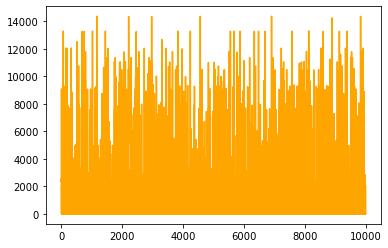

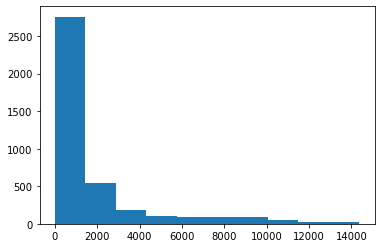

             Error
count  3973.000000
mean      0.159326
std       0.146385
min       0.001027
25%       0.026317
50%       0.112658
75%       0.257722
max       0.698318


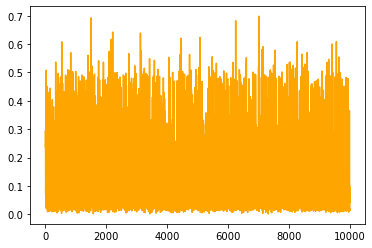

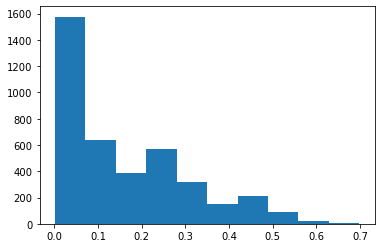

In [16]:
for record in RECORDS:
    data_histogram_x = []
    data_histogram_y= []
    for i in range(record['start']-1, record['end'],1):
        split_line = file[i].rstrip().split('	')
        # print(split_line)

        data_histogram_x.append(float(split_line[2]))
        data_histogram_y.append(float(split_line[3]))
    plt.plot(data_histogram_x,data_histogram_y, c="orange")
    data_histogram_y_pd = pd.DataFrame(data_histogram_y, columns=[record['name']])
    print(data_histogram_y_pd.round(6).describe())
    fig = plt.gcf()
    # fig.set_size_inches(18.5, 10.5)
    fig.savefig(f"{record['name']}.png", dpi=100, facecolor=(1, 1, 1))
    plt.show()
    plt.hist(data_histogram_y, bins=10)
    plt.show()

              Delay
count  3.972000e+03
mean   2.516667e+00
std    3.516950e-13
min    2.516667e+00
25%    2.516667e+00
50%    2.516667e+00
75%    2.516667e+00
max    2.516667e+00


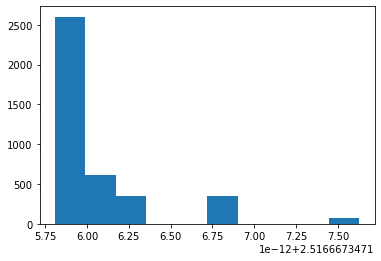

In [17]:
delay_pd = pd.DataFrame(np.diff(data_histogram_x), columns=['Delay'])
plt.hist(delay_pd)
print(delay_pd.describe())